In [3]:
import pandas as pd
from matplotlib import pyplot as plt
framingham = pd.read_csv(r'C:\Users\USER\Downloads\Samples\Andrew Ng\Octave Submission scripts\Javascript\Framingham-Heart-Study-master\framingham.csv')
framingham.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


<AxesSubplot:xlabel='age', ylabel='count'>

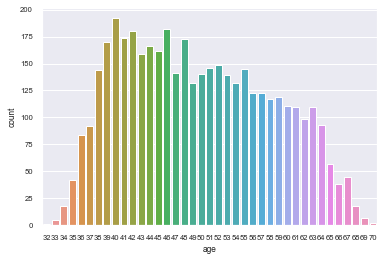

In [4]:
import seaborn as sns
sns.set(font_scale = 0.7)
sns.countplot(x = 'age', data= framingham)

<AxesSubplot:xlabel='count', ylabel='education'>

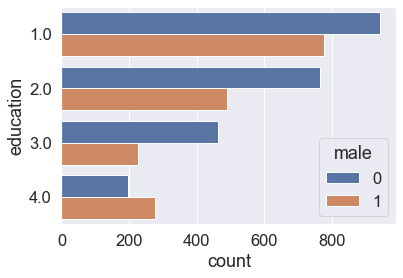

In [5]:
sns.set(font_scale = 1.5)
sns.countplot(y = 'education', data= framingham, hue= 'male')

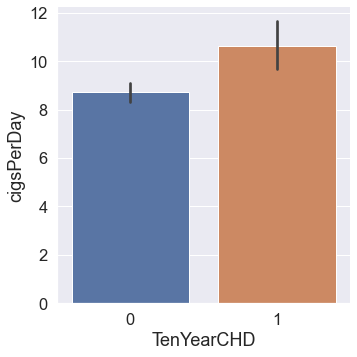

In [6]:
sns.catplot(x='TenYearCHD', y= 'cigsPerDay',kind= 'bar',data= framingham)

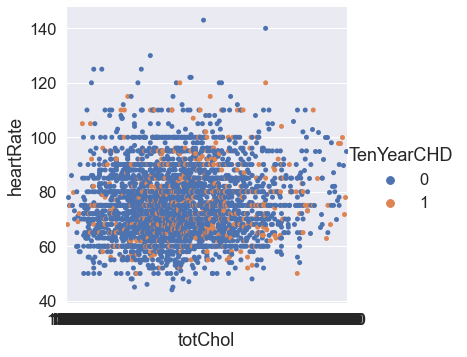

In [7]:
sns.catplot(x='totChol', y= 'heartRate', hue = "TenYearCHD",data= framingham)


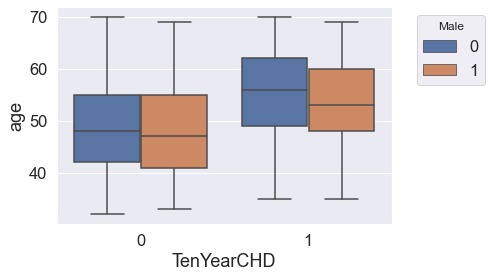

In [6]:
sns.boxplot(x='TenYearCHD', y='age',hue='male',data= framingham)
plt.legend(bbox_to_anchor = (1.05,1), loc=2, title="Male" )

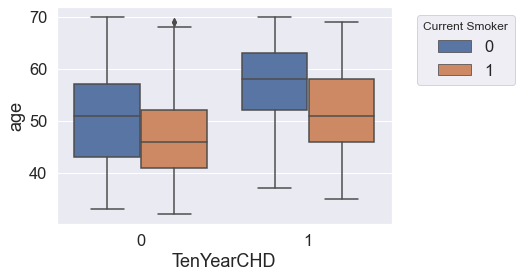

In [7]:
sns.boxplot(x='TenYearCHD', y='age',hue='currentSmoker',data= framingham)
plt.legend(bbox_to_anchor = (1.05,1), loc=2, title = "Current Smoker")

(70.0, 725.45)

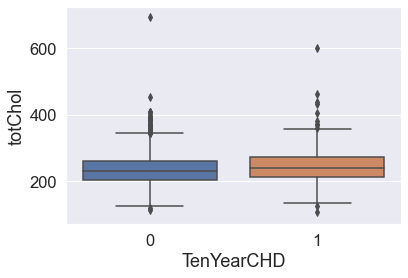

In [8]:
sns.boxplot(x= 'TenYearCHD', y= 'totChol', data= framingham)
plt.ylim(70)

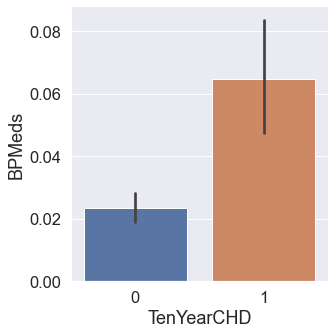

In [9]:
sns.catplot(x='TenYearCHD',y='BPMeds',kind='bar',data=framingham)

In [10]:
framingham.isnull().any()
#checking for missing values

male               False
age                False
education           True
currentSmoker      False
cigsPerDay          True
BPMeds              True
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol             True
sysBP              False
diaBP              False
BMI                 True
heartRate           True
glucose             True
TenYearCHD         False
dtype: bool

In [11]:
framingham.isna().any()
#checking for NaN values

male               False
age                False
education           True
currentSmoker      False
cigsPerDay          True
BPMeds              True
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol             True
sysBP              False
diaBP              False
BMI                 True
heartRate           True
glucose             True
TenYearCHD         False
dtype: bool

In [12]:
nan_headings = ['education','cigsPerDay','BPMeds','totChol','BMI','heartRate','glucose']
for i in range(len(nan_headings)):
    num_missing = (framingham[nan_headings[i]].isna().sum())
    print(nan_headings[i],num_missing)
#These are the number of NaN under each of the headings in the is_na list pulled from previous headings with "True" results.

education 105
cigsPerDay 29
BPMeds 53
totChol 50
BMI 19
heartRate 1
glucose 388


###So we can remove the NaN since 388 is just 9% of the entire dataset###

In [13]:
bool_series = pd.isna(framingham['education'])
framingham[bool_series]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
33,1,61,NaN,1,5.0,0.0,0,0,0,175.0,134.0,82.5,18.59,72.0,75.0,1
36,1,56,NaN,0,0.0,0.0,0,0,0,257.0,153.5,102.0,28.09,72.0,75.0,0
72,0,37,NaN,0,0.0,0.0,0,0,0,200.0,119.0,79.0,33.29,67.0,87.0,0
184,1,67,NaN,0,0.0,0.0,0,0,0,257.0,125.0,67.5,25.95,65.0,69.0,0
213,0,34,NaN,0,0.0,0.0,0,0,0,163.0,107.0,71.0,23.88,73.0,80.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4082,1,47,NaN,0,0.0,0.0,0,1,0,254.0,137.5,91.0,31.98,75.0,69.0,0
4098,1,37,NaN,1,20.0,0.0,0,0,0,184.0,113.0,81.0,22.16,85.0,63.0,0
4121,0,55,NaN,0,0.0,0.0,0,0,0,240.0,145.0,96.0,26.27,72.0,NaN,0
4122,1,69,NaN,1,23.0,0.0,0,1,0,186.0,179.0,93.0,26.64,72.0,67.0,0


In [14]:
framingham = framingham.dropna()

In [15]:
framingham.isna().any()
#after removing there are no NaN values now.

male               False
age                False
education          False
currentSmoker      False
cigsPerDay         False
BPMeds             False
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol            False
sysBP              False
diaBP              False
BMI                False
heartRate          False
glucose            False
TenYearCHD         False
dtype: bool

In [16]:
framingham['TenYearCHD'].value_counts()

0    3101
1     557
Name: TenYearCHD, dtype: int64

In [17]:
# our prediction should always be about the majority class
#and better than the baseline accuracy.
#so the baseline is computed as:
print(3101/(3101+557))

0.8477310005467469


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = framingham.drop('TenYearCHD',axis=1)
y = framingham['TenYearCHD']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

In [21]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [22]:

oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_over,y_over,test_size=0.30)

In [23]:
steps = [('under', RandomUnderSampler()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)

In [24]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('under', RandomUnderSampler()),
                ('model', DecisionTreeClassifier())])

In [25]:
pipepred = pipeline.predict(X_test)

In [26]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,pipepred))

              precision    recall  f1-score   support

           0       0.99      0.81      0.89       948
           1       0.83      0.99      0.90       913

    accuracy                           0.90      1861
   macro avg       0.91      0.90      0.90      1861
weighted avg       0.91      0.90      0.90      1861



In [27]:
accuracy_score(y_test,pipepred)

0.8968296614723267

In [ ]:
#THIS ACCURACY BEATS THE BASELINE SCORE.